In [41]:
# Importando pacotes

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.filters import sobel
from skimage.morphology import remove_small_holes, remove_small_objects
import nibabel as nib
import pandas as pd

In [49]:
# Definindo funções e variáveis para carregar imagens
dir_name = "../data/raw/"
img_data = pd.read_csv("../data/description.csv", dtype=str)

def getFilenameFromID(df, Id):
    file_name = "CC"
    for h in df.columns:
        file_name+=df[h][Id]+'_'
    file_name= file_name[:-1]+".nii"
    return file_name

def loadRandomImage():
    # Carrega imagem como um ndarray
    random_id = np.random.randint(0,high=358)
    file_name = getFilenameFromID(img_data, random_id)
    f = nib.load(dir_name+file_name).get_fdata()
    
    # Retira a fatia sagital central da imagem e
    # a rotaciona para uma posição mais natural 
    # e a coloca no intervalo de 0 a 255
    x = int(f.shape[0]/2)
    img = ndi.rotate(f[x,:,:], 90)
    img = 255*img/np.max(img)
    img = img.astype(np.uint8)
    
    return img, file_name

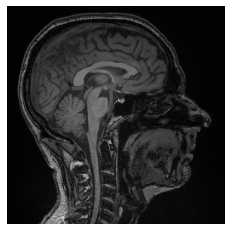

CC0221_siemens_3_61_M.nii (256, 256)


In [50]:
# Carregando uma imagem aleatória

img, file_name = loadRandomImage()
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()
print(file_name, img.shape)

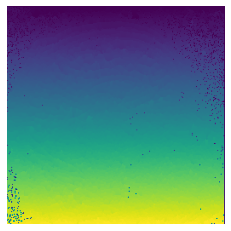

In [44]:
labels = watershed(img, mask=img)
plt.imshow(labels)
plt.axis("off")
plt.show()

# Péssimo resutado

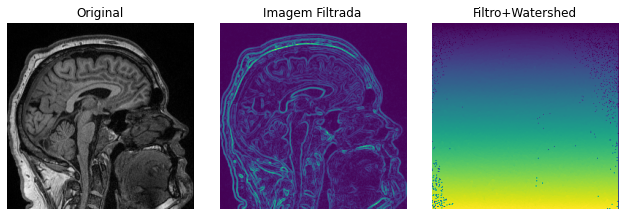

In [45]:
filtered_img = sobel(img)
labels = watershed(filtered_img, mask=img)

# Plot
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[1].imshow(filtered_img)
ax[1].set_title('Imagem Filtrada')
ax[2].imshow(labels)
ax[2].set_title('Filtro+Watershed')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# Em alguns casos há uma melhora notável (o contorno da cabeça do paciente fica bem definido),
# em outros há pouca diferença em relação ao teste 1

## Resultados:

Os primeiros testes tiveram péssimos resultados, sua função foi apenas explorar, mas é interessante notar que em alguns casos podemos delimitar a cabeça do paciente usando apenas isso.